### 1. Load the dataset into memory

In [1]:
import pandas as pd
aot = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv", sep = ',')
chang = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Changping_20130301-20170228.csv", sep = ',')
ding = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Dingling_20130301-20170228.csv", sep = ',')
dong = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Dongsi_20130301-20170228.csv", sep = ',')
guan = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Guanyuan_20130301-20170228.csv", sep = ',')
guch = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Gucheng_20130301-20170228.csv", sep = ',')
hua = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Huairou_20130301-20170228.csv", sep = ',')
nong = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Nongzhanguan_20130301-20170228.csv", sep = ',')
shun = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Shunyi_20130301-20170228.csv", sep = ',')
tian = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Tiantan_20130301-20170228.csv", sep = ',')
wan = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Wanliu_20130301-20170228.csv", sep = ',')
wansh = pd.read_csv("PRSA_Data_20130301-20170228\PRSA_Data_Wanshouxigong_20130301-20170228.csv", sep = ',')

df = pd.concat([aot, chang, ding, dong, guan, guch, hua, nong, shun, tian, wan, wansh], axis=0)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [2]:
df=df.drop('station', axis=1)
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
PRES     float64
DEWP     float64
RAIN     float64
wd        object
WSPM     float64
dtype: object

### 2. Clean the data and check missing values for the dataset

In [3]:
df.isnull().sum(axis = 0)

No           0
year         0
month        0
day          0
hour         0
PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
wd        1822
WSPM       318
dtype: int64

In [4]:
df.shape

(420768, 17)

Drop rows with missing values

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum(axis = 0)

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

### 3. Perform feature engineering on the feature

In [7]:
df['wd'] = df['wd'].astype('category')
df['wd'] = df['wd'].cat.codes
df['wd'].unique()
#factors = pd.get_dummies(df['wd'], drop_first=True)
#factors.head()

array([ 6,  3,  7,  5,  1,  0,  4, 13, 11, 15,  9, 14, 10,  2,  8, 12],
      dtype=int8)

In [8]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
PRES     float64
DEWP     float64
RAIN     float64
wd          int8
WSPM     float64
dtype: object

In [9]:
# drop No column as it is the row numbers
df = df.drop('No', axis=1)
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0


### 4. Split the data using a 80/20 split

In [10]:
df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [11]:
# Get the features and the target variable
X = df.drop('wd', axis = 1)
y = df['wd']

# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)

### 5. Preprocess the data using Normalization

In [12]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X_train= normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

### 6. Build a neural network using Tensorflow

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
# Neuron network with 2 hidden layers of 20 and 10 neurons
model1 = keras.Sequential(
    [
        layers.Dense(62, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(units = len(df['wd'].unique()), activation='softmax'),
    ]
)

In [15]:
# Configure the model
model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [16]:
%%time
#Fix the seed 
tf.random.set_seed(1)
#Fit the model and save the results in history
history = model1.fit(x=X_train,y=y_train,batch_size=64,epochs=100,
          validation_data=(X_test,y_test), verbose=0
          )

CPU times: total: 2h 21min 56s
Wall time: 23min 21s


In [17]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame(history.history)
#Add the epoch index
trainhist['epoch'] = history.epoch
#Look at the latest performance
trainhist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,2.426047,0.180824,2.550632,0.162101,95
96,2.425966,0.180742,2.468619,0.173457,96
97,2.426006,0.181033,2.447790,0.176440,97
98,2.425222,0.181334,2.431343,0.182340,98
99,2.425084,0.180791,2.460058,0.175131,99


Visualize training and validation loss on same plot

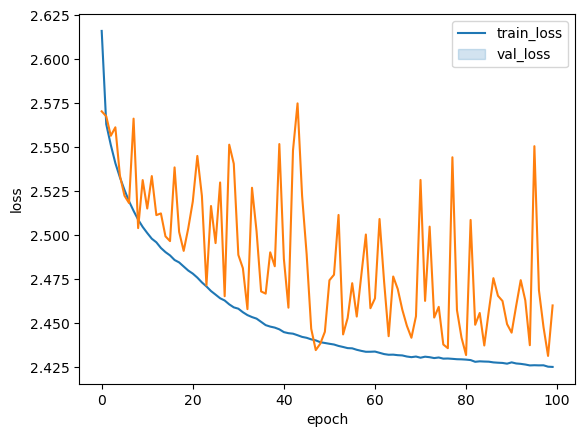

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

### Does it overfit or underfit the data?
The model is overfitting as the validation loss has a lot of noises.

### 7. Tune the model using keras-tuner

Install/Import keras-tuner

In [19]:
import sys
#Check the existence of the keras-tuner library
if ( 'keras-tuner' not in sys.modules):
    #If it was not installed, then install it
    !pip install -q -U keras-tuner
#Import the library of keras-tuner
import keras_tuner as kt

In [20]:
def model_builder(hp):
    model = keras.Sequential(
        [
            #Input layer
            layers.Dense(62, activation='relu'),
            #1st hidden layer
            layers.Dense(units=hp.Int('units1', min_value=20, max_value=100, step=5), activation='relu'),
            layers.Dropout(rate=hp.Float('rate1', min_value=0.2, max_value=0.8, step=0.1)),
            # 2nd hidden layer
            layers.Dense(units=hp.Int('units2', min_value=10, max_value=50, step=2), activation='relu'),
            layers.Dropout(rate=hp.Float('rate2', min_value=0.2, max_value=0.8, step=0.1)),
            # Output layer
            layers.Dense(units = len(df['wd'].unique()), activation='softmax'),
        ]
    )
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [21]:
tuner = kt.Hyperband(model_builder, #Specify the model
                     objective = 'val_loss', #Specify the objective funciton
                     max_epochs = 100, #Specify the maximum epochs
                     directory = 'my_dir', #Specify the file path
                     project_name = 'tuningClassification')

Reloading Tuner from my_dir\tuningClassification\tuner0.json


In [22]:
import IPython
#Clear all the training outputs
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [23]:
#Perform the search on the defined hyperparameter space by specifying the callback to clear the training outputs
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test,y_test), callbacks = [ClearTrainingOutput()])

In [24]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The optimal number of units in the first hidden layer =  {best_hps.get('units1')}.
The optimal droupout rate in the first hidden layer = {best_hps.get('rate1')}.
The optimal number of units in the second hidden layer =  {best_hps.get('units2')}.
The optimal droupout rate in the second hidden layer = {best_hps.get('rate2')}
""")


The optimal number of units in the first hidden layer =  75.
The optimal droupout rate in the first hidden layer = 0.2.
The optimal number of units in the second hidden layer =  42.
The optimal droupout rate in the second hidden layer = 0.2



### 8. Build a neural network using PyTorch

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [26]:
X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.int64))

In [27]:
input_size = X_train.shape[1]
output_size = len(df['wd'].unique())
#specify the number of neuron for the first layer
hidden_size = [62, 20, 10]
print(input_size)
print(output_size)

#convert numpy to tensor from_numpy
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.int64))

15
16


In [28]:
# define the child module class derivated from parent class of torch.nn.Module)
class LinearClassificationModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size):
        super(LinearClassificationModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0]) 
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1]) 
        self.hidden3 = torch.nn.Linear(hidden_size[1], hidden_size[2]) 
        self.predict = torch.nn.Linear(hidden_size[2], output_size)  
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hidden1(x))  
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        y_pred = self.predict(x)            
        return y_pred

In [29]:
model = LinearClassificationModel(input_size, hidden_size, output_size)

In [30]:
l = nn.CrossEntropyLoss()

In [31]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

C:\Users\MRT\anaconda3\lib\site-packages\torch\cuda\__init__.py:749: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count


In [32]:
%%time
from sklearn.metrics import mean_squared_error
#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs

num_epochs = 1500

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
        
        output = model(X_train)
        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        valadition_loss[epoch] = val_loss.item()
        if epoch % 500 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))


    

epoch 0, loss = 2.7878 and val_loss = 2.7888
epoch 500, loss = 2.7615 and val_loss = 2.7624
epoch 1000, loss = 2.7505 and val_loss = 2.7513
CPU times: total: 1h 25min 43s
Wall time: 14min 11s


In [33]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

,train_loss,val_loss,epoch
1495,2.745213,2.746029,1495
1496,2.745205,2.746021,1496
1497,2.745198,2.746014,1497
1498,2.745191,2.746007,1498
1499,2.745183,2.745999,1499


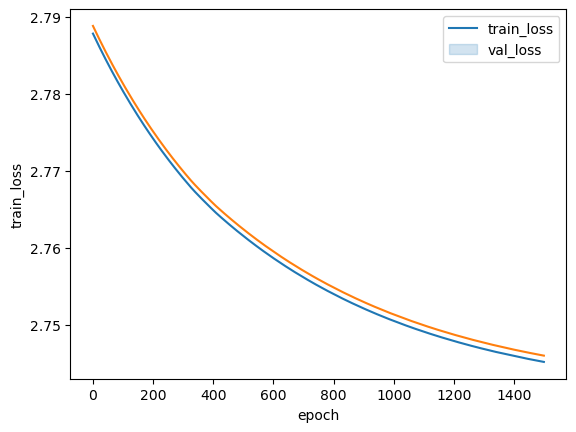

In [34]:
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

###  Does it overfit or underfit the data?
It underfits the data as the training and validation loss reduce dramatically at the beginning then continuously decrease with negative slope. The model does not converge.